# Data Analysis Portfolio Project - Movie Correlation Project

In [110]:
# First I import the packages need for this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in the data
df = pd.read_csv('/Users/oluwadamilolavera-cruz/Library/CloudStorage/Box-Box/Courses/Data Analytics/Portfolio/Data Analysis Project - Python Correlation/movies.csv')

In [111]:
# Preview data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [112]:
# Checking for missing Data

def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []

    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))
    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'pc_missing': pc_missing
    })
    return output

In [113]:
show_missing(df)

,variable,dtype,count,unique,missing,pc_missing
0,name,object,7668,7512,0,0.00
1,rating,object,7668,13,77,1.00
2,genre,object,7668,19,0,0.00
3,year,int64,7668,41,0,0.00
4,released,object,7668,3415,2,0.03
5,score,float64,7668,73,3,0.04
6,votes,float64,7668,937,3,0.04
7,director,object,7668,2949,0,0.00
8,writer,object,7668,4536,3,0.04
9,star,object,7668,2815,1,0.01


In [114]:
df = df.dropna()

show_missing(df)

,variable,dtype,count,unique,missing,pc_missing
0,name,object,5421,5336,0,0.0
1,rating,object,5421,10,0,0.0
2,genre,object,5421,15,0,0.0
3,year,int64,5421,41,0,0.0
4,released,object,5421,2560,0,0.0
5,score,float64,5421,72,0,0.0
6,votes,float64,5421,717,0,0.0
7,director,object,5421,2063,0,0.0
8,writer,object,5421,3205,0,0.0
9,star,object,5421,1845,0,0.0


In [115]:
# Basic Data Cleaning
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


show_missing(df)

,variable,dtype,count,unique,missing,pc_missing
0,name,object,5421,5336,0,0.0
1,rating,object,5421,10,0,0.0
2,genre,object,5421,15,0,0.0
3,year,int64,5421,41,0,0.0
4,released,object,5421,2560,0,0.0
5,score,float64,5421,72,0,0.0
6,votes,int64,5421,717,0,0.0
7,director,object,5421,2063,0,0.0
8,writer,object,5421,3205,0,0.0
9,star,object,5421,1845,0,0.0


In [116]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [117]:
df = df.drop('released', axis=1)

In [118]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [119]:
df.shape

(5421, 14)

In [120]:
# Cross checking for duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


### Hypothesis from Data
* Budget will have high correlation with revenue
* Company will have high correlation with revenue

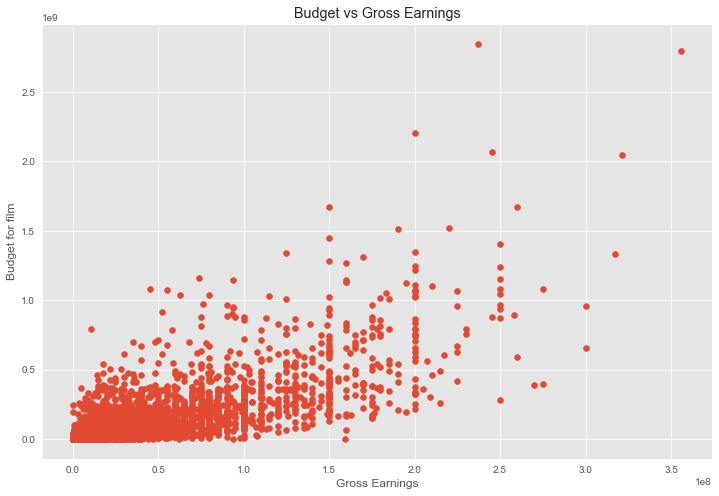

In [121]:
# Budget correlation hypothesis

# Scatter plot comparison budget vs revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()


In [122]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

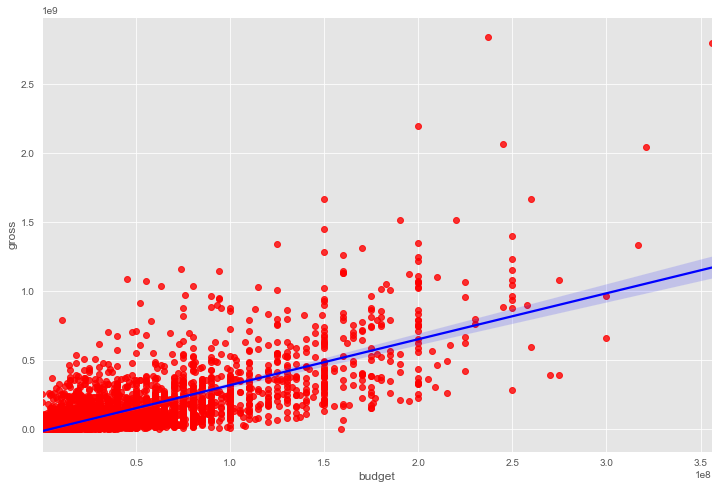

In [123]:


sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [124]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


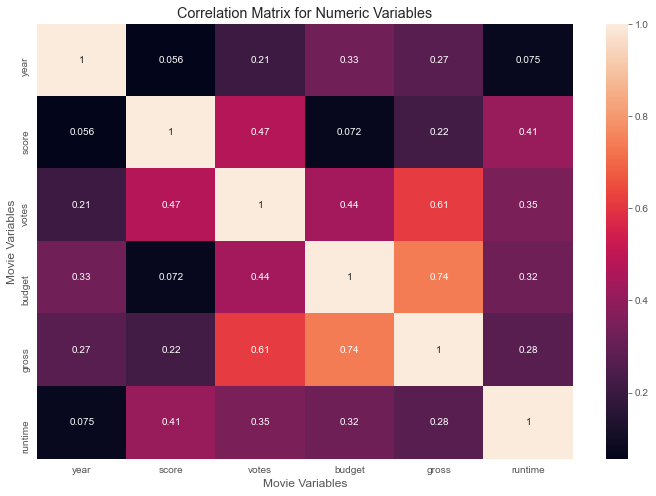

In [125]:
# Budget correlation hypothesis is True

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Variables')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')

plt.show()

_From the above matrix, the hypothesis that movie budget will have high correlation with movie revenue is True_

In [126]:
# Company correlation hypothesis

df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df_num

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0
2434,2969,5,0,1993,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0
3681,1595,3,6,2000,6.8,43000,952,1683,527,6,5000000,2554,466,108.0
272,2909,6,9,1982,3.9,2300,261,55,1473,47,800000,2270,582,85.0


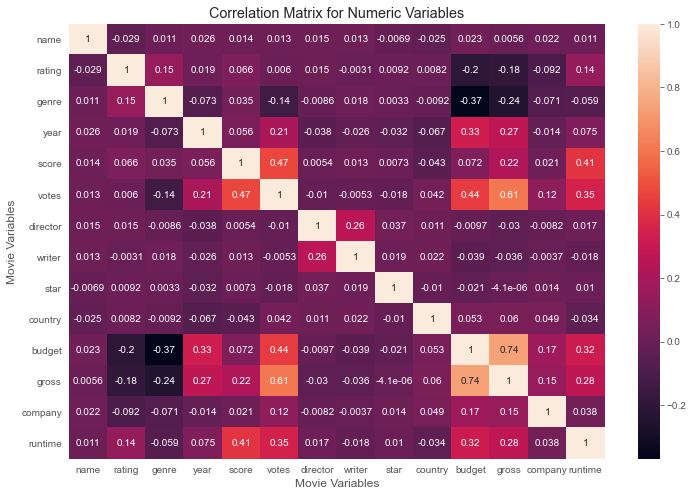

In [127]:
correlation_matrix = df_num.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Variables')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')

plt.show()

In [128]:
df_num.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
score,0.014450,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
country,-0.025490,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477


In [129]:
correlation_mat = df_num.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name       1.000000
         rating    -0.029234
         genre      0.010996
         year       0.025542
         score      0.014450
                      ...   
runtime  country   -0.034477
         budget     0.318695
         gross      0.275796
         company    0.037585
         runtime    1.000000
Length: 196, dtype: float64

In [130]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.368523
budget   genre     -0.368523
gross    genre     -0.244101
genre    gross     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64

In [131]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

_From the above matrix, the hypothesis that company will have high correlation with movie revenue is False_

However, it was discovered that number of votes had a high correlation with movie revenue.

#### In conlusion, votes and budget had the highest correlation with movie revenue.